In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


**Importing and exploring data.**

In [2]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [3]:
print(f'Number of columns in train dataset: {train.shape[1]}\
\nNumber of samples in train dataset: {train.shape[0]} \n')

Number of columns in train dataset: 14
Number of samples in train dataset: 8693 



In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.describe().T.sort_values(by = 'mean', ascending = False).style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
print(f'Total amount of nulls: {sum(train.isnull().any(axis = 1))}')

Total amount of nulls: 2087


In [8]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [9]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
print(f'Number of columns: {test.shape[1]} \nNumber of samples: {test.shape[0]}')

Number of columns: 13 
Number of samples: 4277


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [12]:
test.describe().T.sort_values(by = 'mean', ascending = False).style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
FoodCourt,4171.000000,439.484296,1527.663045,0.000000,0.000000,0.000000,78.000000,25273.000000
VRDeck,4197.000000,310.710031,1246.994742,0.000000,0.000000,0.000000,36.000000,22272.000000
Spa,4176.000000,303.052443,1117.186015,0.000000,0.000000,0.000000,50.000000,19844.000000
RoomService,4195.000000,219.266269,607.011289,0.000000,0.000000,0.000000,53.000000,11567.000000
ShoppingMall,4179.000000,177.295525,560.821123,0.000000,0.000000,0.000000,33.000000,8292.000000
Age,4186.000000,28.658146,14.179072,0.000000,19.000000,26.000000,37.000000,79.000000


In [13]:
print(f'Total amount of nulls: {sum(test.isnull().any(axis = 1))}')

Total amount of nulls: 996


EDA.

In [14]:
import plotly.express as px
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

Homeplanet and destination

In [15]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Fraction of people who get transported by homeplanet

In [16]:
pd.DataFrame(train.groupby('HomePlanet')['Transported'].mean()).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
HomePlanet,
Europa,0.658846
Mars,0.523024
Earth,0.423946


The biggest fraction of transported is from Europe, but the lowest is from Earth

The amount of transported people by homeplanet 

In [17]:
pd.DataFrame(train.groupby('HomePlanet')['Transported'].apply(lambda x: sum(x))).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
HomePlanet,
Earth,1951
Europa,1404
Mars,920


It seems that most people that got transported are from Earth, but most people are from Earth, so fraction is more informative in this case

Fraction of people who get transported by the place of destination

In [18]:
pd.DataFrame(train.groupby('Destination')['Transported'].mean()).style.bar()

,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.471175


The total amount of people who got transported by destination

In [19]:
pd.DataFrame(train.groupby('Destination')['Transported'].apply(lambda x: sum(x))).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
Destination,
TRAPPIST-1e,2787
55 Cancri e,1098
PSO J318.5-22,401


The total amount of people by the place of destination

In [20]:
pd.DataFrame(train.groupby('Destination')['Transported'].apply(lambda x: x.count())).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


Most people were going to TRAPPIST-1e, so it's not surprising that the highest total amount of transported people is in this group, but the highest fraction is in the other group

People who got transported by destination and homeplanet

In [21]:
pd.DataFrame(train.groupby(['Destination','HomePlanet'])['Transported'].mean()).sort_values(by = 'Transported',ascending = False).style.\
bar()

Total amount of people by destination and homeplanet

In [22]:
pd.DataFrame(train.groupby(['Destination','HomePlanet'])['Transported'].apply(lambda x:x.count())).sort_values(by = 'Transported',ascending = False).style.\
bar()

Total amount of people who got transported by destination and homeplanet

In [23]:
pd.DataFrame(train.groupby(['Destination','HomePlanet'])['Transported'].apply(lambda x:sum(x))).sort_values(by = 'Transported',ascending = False).style.\
bar()

In [24]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [25]:
fig = px.pie(train, names = 'HomePlanet', title = 'Amount of people by homeplanet')
fig.show()

In [26]:
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
fig = px.bar(train, x = 'HomePlanet', color = 'Transported', barmode = 'group', title = 'Amount of people by homeplanet', color_discrete_sequence=["blue", "black"])
fig.show()

<AxesSubplot:xlabel='Transported', ylabel='count'>

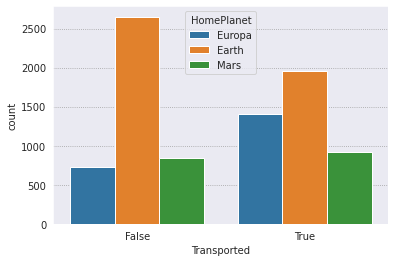

In [27]:
sns.countplot(x = 'Transported', data = train, hue = 'HomePlanet')

<AxesSubplot:xlabel='Transported', ylabel='HomePlanet'>

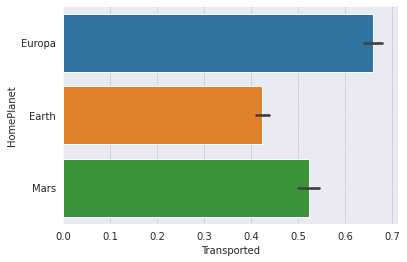

In [28]:
sns.barplot(x = 'Transported', y = 'HomePlanet', data = train)

<AxesSubplot:xlabel='Transported', ylabel='Destination'>

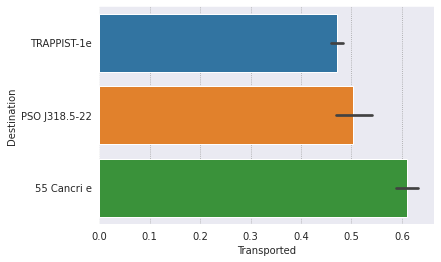

In [29]:
sns.barplot(x = 'Transported', y = 'Destination', data = train)

<AxesSubplot:xlabel='Transported', ylabel='HomePlanet'>

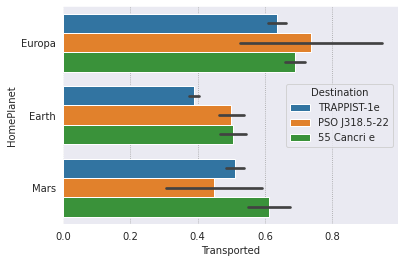

In [30]:
sns.barplot(x = 'Transported', y = 'HomePlanet', hue = 'Destination', data = train)

Cryosleep and age 

Amount of people who were under cryosleep

In [31]:
pd.DataFrame(train.groupby('CryoSleep')['Transported'].apply(lambda x :x.count())).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
CryoSleep,
False,5439
True,3037


Fraction of people who got transported by being under cryosleep or not 

In [32]:
pd.DataFrame(train.groupby('CryoSleep')['Transported'].mean()).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
CryoSleep,
True,0.817583
False,0.328921


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

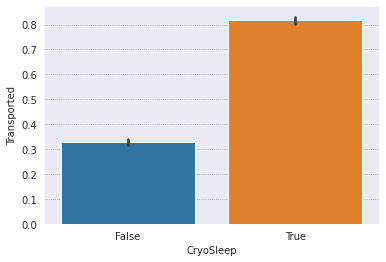

In [33]:
sns.barplot(x='CryoSleep', y = 'Transported', data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

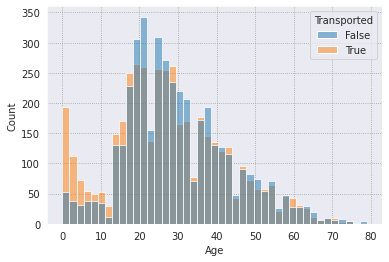

In [34]:
sns.histplot(x = 'Age', data = train, hue = 'Transported')

In [35]:
bins = [0,3,10,18,25,35,45, 60,80]
train_bins = train.copy()

In [36]:
train_bins['Age']= pd.cut(train_bins['Age'],bins)

In [37]:
pd.DataFrame(train_bins.groupby('Age')['Transported'].mean()).sort_values(by = 'Transported',ascending = False).style.\
bar()

,Transported
Age,
"(0, 3]",0.741935
"(3, 10]",0.628483
"(10, 18]",0.544900
"(45, 60]",0.491944
"(35, 45]",0.483847
"(25, 35]",0.483135
"(60, 80]",0.472727
"(18, 25]",0.451502


In [38]:
pd.DataFrame(train_bins.groupby('Age')['CryoSleep'].mean()).sort_values(by = 'CryoSleep',ascending = False).style.\
bar()

,CryoSleep
Age,
"(0, 3]",0.634615
"(10, 18]",0.453237
"(3, 10]",0.444444
"(45, 60]",0.341436
"(25, 35]",0.338357
"(60, 80]",0.330233
"(35, 45]",0.318591
"(18, 25]",0.307031


Children were mostly under cryosleep 

<AxesSubplot:xlabel='Age', ylabel='count'>

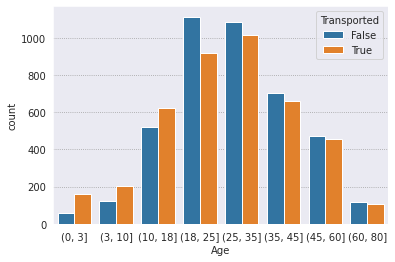

In [39]:
sns.countplot(x = 'Age', data = train_bins, hue = 'Transported')

<AxesSubplot:xlabel='Transported', ylabel='Age'>

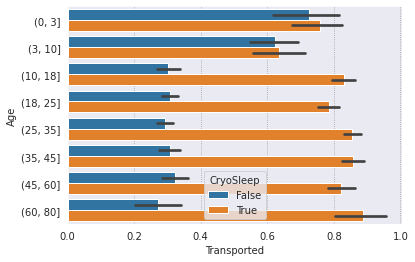

In [40]:
sns.barplot(x = 'Transported', y = 'Age', hue = 'CryoSleep', data = train_bins)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

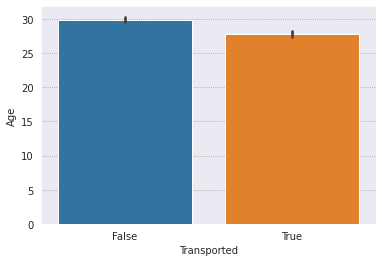

In [41]:
sns.barplot(y = 'Age', x = 'Transported', data = train)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

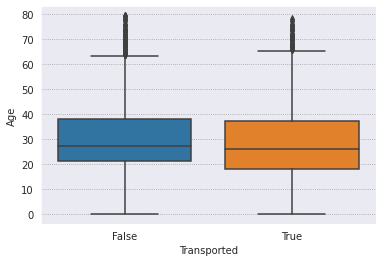

In [42]:
sns.boxplot(x = 'Transported', y = 'Age', data = train)

It seems that the biggest fraction of transported people is in children group, so age is important in predicting, but underaged are more likely to be under cryosleep, so perhaps cryosleep is not important  

VIP

Total amount of people by vip 

In [43]:
pd.DataFrame(train.groupby('VIP')['Transported'].apply(lambda x:x.count())).sort_values(by = 'Transported',\
                        ascending = False).style.bar()

,Transported
VIP,
False,8291
True,199


Amount of people who got transported by VIP 

In [44]:
pd.DataFrame(train.groupby('VIP')['Transported'].apply(lambda x:sum(x))).sort_values(by = 'Transported',\
                        ascending = False).style.bar()

,Transported
VIP,
False,4198
True,76


Fraction of people who got transported by VIP 

In [45]:
pd.DataFrame(train.groupby('VIP')['Transported'].mean()).sort_values(by = 'Transported',\
                        ascending = False).style.bar()

,Transported
VIP,
False,0.506332
True,0.381910


<AxesSubplot:xlabel='VIP', ylabel='count'>

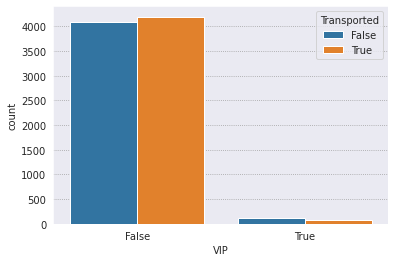

In [46]:
sns.countplot(x = 'VIP', data = train, hue = 'Transported')

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

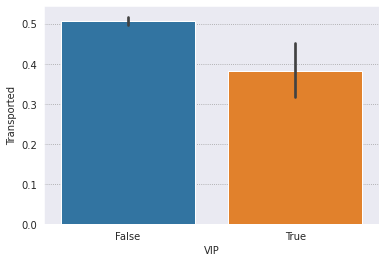

In [47]:
sns.barplot(x = 'VIP', y = 'Transported', data = train)

Passengerid 

In [48]:
pi = train.copy()

In [49]:
pi.dropna(axis = 0, inplace = True)

In [50]:
pi.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [51]:
def id(data):
    feat = data.columns 
    data['grid'] = data['PassengerId'].str.split('_').apply(lambda x:x[0]).astype('int')
    data['indid'] = data['PassengerId'].str.split('_').apply(lambda x:x[1]).astype('int')
    data['last_name'] = data['Name'].str.split().apply(lambda x:x[1])

In [52]:
id(pi)

In [53]:
pi1 = pd.DataFrame(pi.groupby(['grid', 'last_name'])['Transported'].count()).sort_values(by = 'Transported',ascending = False).reset_index()
pi = pi.merge(pi1, on = 'grid', how = 'left').drop(['last_name_x','last_name_y'], axis = 1)


In [54]:
pi['num_of_relat'] = pi['Transported_y']
pi['Transported'] = pi['Transported_x']
pi.drop(['Transported_y','Transported_x'],axis = 1, inplace = True)

Fraction of transported by number of relatives

In [55]:
pd.DataFrame(pi.groupby('num_of_relat')['Transported'].mean()).\
             sort_values(by = 'Transported',ascending = False).style.bar()

,Transported
num_of_relat,
5,0.647727
4,0.604938
3,0.589124
2,0.541667
6,0.521277
1,0.484272
7,0.454545


<AxesSubplot:xlabel='indid', ylabel='count'>

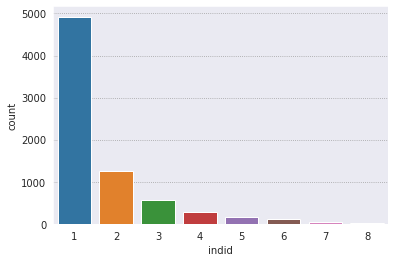

In [56]:
sns.countplot(x = 'indid', data = pi)

<AxesSubplot:xlabel='num_of_relat', ylabel='count'>

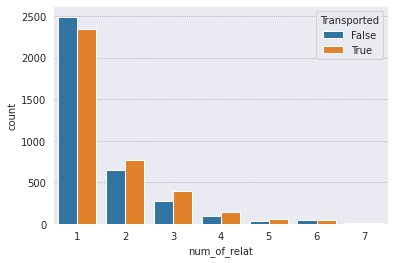

In [57]:
sns.countplot(x = 'num_of_relat', data = pi, hue = 'Transported')

In [58]:
print(f'Correlation coeff between individual number and transported:{pi[["Transported","indid"]].corr().loc["Transported","indid"]}')

Correlation coeff between individual number and transported:0.07097950475678903


In [59]:
pi = pi.merge(pi.groupby('grid')['Name'].count(), left_on = 'grid', right_index=True)

<AxesSubplot:xlabel='Name_y', ylabel='count'>

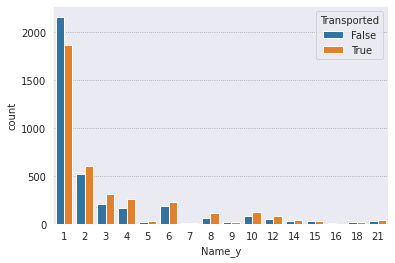

In [60]:
sns.countplot(x = 'Name_y', data = pi, hue = 'Transported')

<AxesSubplot:xlabel='Transported', ylabel='indid'>

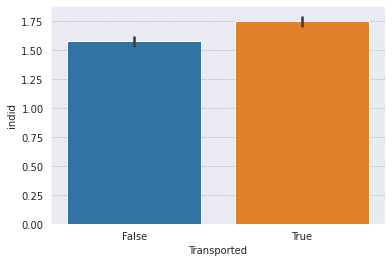

In [61]:
sns.barplot(x = 'Transported', y = 'indid', data = pi)

In [62]:
cabin = train[['Cabin','Transported']]

In [63]:
cabin.dropna(inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
t = cabin['Cabin'].str.split('/')
cabin['deck'] = t.apply(lambda x: x[0])
cabin['num'] = t.apply(lambda x: x[1]).astype('float')
cabin['side'] = t.apply(lambda x: x[2])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [65]:
cabin

,Cabin,Transported,deck,num,side
0,B/0/P,False,B,0.0,P
1,F/0/S,True,F,0.0,S
2,A/0/S,False,A,0.0,S
3,A/0/S,False,A,0.0,S
4,F/1/S,True,F,1.0,S
...,...,...,...,...,...
8688,A/98/P,False,A,98.0,P
8689,G/1499/S,False,G,1499.0,S
8690,G/1500/S,True,G,1500.0,S
8691,E/608/S,False,E,608.0,S


In [66]:
cabin.groupby('side')['Transported'].mean()

side
P    0.451260
S    0.555037
Name: Transported, dtype: float64

<AxesSubplot:xlabel='side', ylabel='count'>

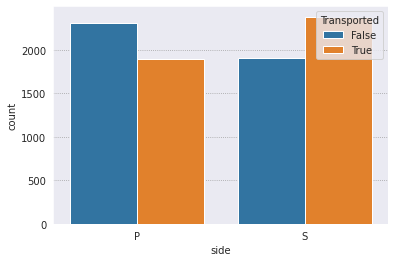

In [67]:
sns.countplot(x = 'side', hue = 'Transported', data = cabin)

<AxesSubplot:xlabel='Transported', ylabel='side'>

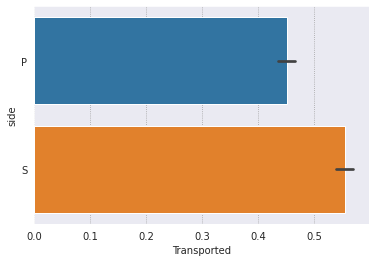

In [68]:
sns.barplot(x = 'Transported', y = 'side', data = cabin)

In [69]:
pd.DataFrame(cabin.groupby('deck')['Transported'].mean()).sort_values(by = 'Transported', ascending = False).\
style.bar()

,Transported
deck,
B,0.734275
C,0.680054
G,0.516217
A,0.496094
F,0.439871
D,0.433054
E,0.357306
T,0.200000


<AxesSubplot:xlabel='deck', ylabel='count'>

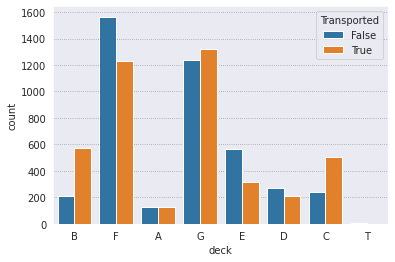

In [70]:
sns.countplot(x = 'deck', data = cabin, hue = 'Transported')

<AxesSubplot:xlabel='Transported', ylabel='deck'>

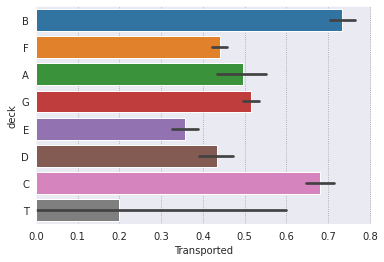

In [71]:
sns.barplot(x = 'Transported', y = 'deck', data = cabin)

In [72]:
pd.DataFrame(cabin.groupby(['side','deck'])['Transported'].mean()).sort_values(by = 'Transported', ascending = False).\
style.bar()

In [73]:
cabin[['Transported','num']].corr().style.bar()

,Transported,num
Transported,1.000000,-0.045097
num,-0.045097,1.000000


<AxesSubplot:xlabel='Transported', ylabel='num'>

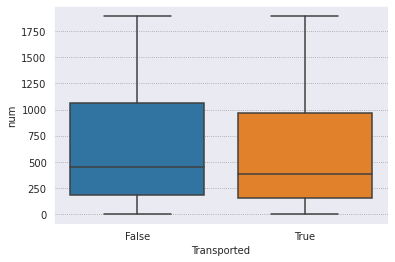

In [74]:
sns.boxplot( x = 'Transported', y = 'num', data = cabin)

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

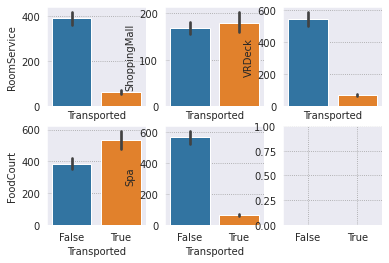

In [75]:
fig, axs = plt.subplots(nrows = 2,ncols = 3, sharex = True)
sns.barplot(x = 'Transported',y = 'RoomService', data = train, ax = axs[0,0])
sns.barplot(x = 'Transported', y = 'FoodCourt', data = train, ax = axs[1,0])
sns.barplot(x = 'Transported', y = 'ShoppingMall', data = train, ax = axs[0,1])
sns.barplot(x = 'Transported', y = 'Spa', data = train, ax = axs[1,1])
sns.barplot(x = 'Transported', y = 'VRDeck', data = train, ax = axs[0,2])

Preparing data

In [76]:
target = 'Transported'
features = [column for column in train.columns if column!=target]

In [77]:
X_train = train[features]
X_test = test[features]
y_train = train[target]

In [78]:
X_train['grid']=X_train['PassengerId'].str.split('_').apply(lambda x:x[0]).astype('int')
X_train['indid'] = X_train['PassengerId'].str.split('_').apply(lambda x:x[1]).astype('int')
X_test['grid']=X_test['PassengerId'].str.split('_').apply(lambda x:x[0]).astype('int')
X_test['indid'] = X_test['PassengerId'].str.split('_').apply(lambda x:x[1]).astype('int')

In [79]:
X_train.drop(['PassengerId','Name'], axis = 1, inplace = True)
X_test.drop(['PassengerId','Name'],axis = 1, inplace = True)
features1 = X_train.columns

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [81]:
X_train = pd.DataFrame(X_train)
X_train.columns = features1
X_test = pd.DataFrame(X_test)
X_test.columns = features1

In [82]:
def cat(columns,df):
    for col in columns:
        df[col] = df[col].map({True:1,False:0})

In [83]:
cat(['CryoSleep','VIP'],X_train)
cat(['CryoSleep', 'VIP'],X_test)

In [84]:
X_train['deck'] = X_train['Cabin'].str.split('/').apply(lambda x:x[0])
X_train['num'] = X_train['Cabin'].str.split('/').apply(lambda x:x[1])
X_train['side'] = X_train['Cabin'].str.split('/').apply(lambda x:x[2])

In [85]:
X_test['deck'] = X_test['Cabin'].str.split('/').apply(lambda x:x[0])
X_test['num'] = X_test['Cabin'].str.split('/').apply(lambda x:x[1])
X_test['side'] = X_test['Cabin'].str.split('/').apply(lambda x:x[2])

In [86]:
X_train = pd.get_dummies(X_train,columns = ['HomePlanet','Destination','deck','side'], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ['HomePlanet','Destination','deck','side'], drop_first=True)

In [87]:
X_train.drop(['Cabin'], axis = 1, inplace = True)
X_test.drop(['Cabin'], axis = 1, inplace = True)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [90]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train,y_train, train_size = 0.8, random_state=42)

In [91]:
model1 = LogisticRegression()
model1.fit(X_train1,y_train1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [92]:
scores = {}
scores['Logistic regression'] = [accuracy_score(model1.predict(X_train1),y_train1),accuracy_score(model1.predict(X_test1),y_test1)]

In [93]:
model2 = GradientBoostingClassifier()
model2.fit(X_train1,y_train1)

GradientBoostingClassifier()

In [94]:
scores['Gradient boosting'] = [accuracy_score(model2.predict(X_train1),y_train1),accuracy_score(model2.predict(X_test1),y_test1)]

In [95]:
model3 = RandomForestClassifier(random_state = 42)
model3.fit(X_train1,y_train1)

RandomForestClassifier(random_state=42)

In [96]:
scores['Random forest'] = [accuracy_score(model3.predict(X_train1),y_train1),accuracy_score(model3.predict(X_test1),y_test1)]

In [97]:
model4 = RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       n_estimators=19, random_state=42)
model4.fit(X_train1,y_train1)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       n_estimators=19, random_state=42)

In [98]:
scores['Random forest grid'] = [accuracy_score(model4.predict(X_train1),y_train1),accuracy_score(model4.predict(X_test1),y_test1)]

In [99]:
import keras 
from keras import layers, callbacks 

In [100]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.0001, patience = 20, restore_best_weights = True)



In [101]:
X_k = np.array(X_train1)

In [102]:
X_k.shape

(6954, 23)

In [103]:
 X_k = X_k.reshape(-1, 1, 23)

In [104]:
X_kt = np.array(X_test1).reshape(-1,1,23)

In [105]:

model5 = keras.Sequential([layers.Dense(1024, activation = 'relu', input_shape =(1,23)),\
                           layers.Dropout(0.3),\
                           layers.BatchNormalization(),\
                           layers.Dense(1024, activation = 'relu'),\
                           layers.Dropout(0.3),\
                           layers.BatchNormalization(),\
                           layers.Dense(1024,activation = 'relu'),\
                           layers.Dense(1,activation = 'sigmoid')])
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
history = model5.fit(
    X_k.astype('float'), y_train1.astype('float'),
    validation_data=(X_kt.astype('float'), y_test1.astype('float')),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

2022-12-04 20:21:34.686792: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-04 20:21:34.981117: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Best Validation Loss: 0.4467
Best Validation Accuracy: 0.7821


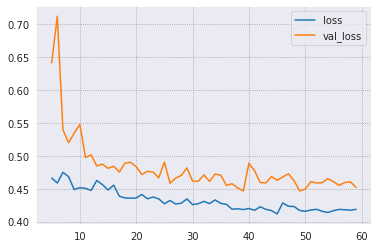

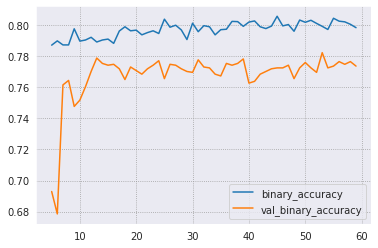

In [106]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [107]:
scores['keras'] = [accuracy_score(model5.predict(X_kt.astype('float')).reshape(-1,1)>=0.5,y_test1),accuracy_score(model5.predict(X_k.astype('float')).reshape(-1,1)>=0.5,y_train1)]

In [108]:
score = pd.DataFrame(scores).T

In [109]:
score.columns = ['train','test']

In [110]:
score.style.highlight_max(axis = 0)

,train,test
Logistic regression,0.783865,0.769408
Gradient boosting,0.825137,0.793560
Random forest,1.000000,0.790684
Random forest grid,0.860800,0.797010
keras,0.778033,0.806586


In [111]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sub['Transported'] = (model5.predict(np.array(X_test.astype('float')).reshape(-1,1,23))>=0.5).reshape(-1,1)
sub.to_csv('submission.csv',index=False)

In [112]:
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
